In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold

#https://seaborn.pydata.org/installing.html
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:
# Load the datasets
tesla_stocks_df = pd.read_csv('../Data/daily_return_day.csv',index_col='date')
tsdf=tesla_stocks_df.copy(deep=True)

elon_musk_df = pd.read_csv('../Data/avg_tweet_sent_score_day.csv', index_col='date')
emdf=elon_musk_df.copy(deep=True)

print("Tesla Stocks Dataframe Head is: \n")
print(tsdf.head())
print("Elon Musk Dataframe Head is: \n")
print(emdf.head())

print("Tesla Stocks Dataframe Count is: \n")
print(tsdf.count())
print("Elon Musk Dataframe Count is: \n")
print(emdf.count())

Tesla Stocks Dataframe Head is: 

            daily_return
date                    
2015-02-02      0.034172
2015-02-03      0.024107
2015-02-04      0.001191
2015-02-05      0.005048
2015-02-06     -0.020901
Elon Musk Dataframe Head is: 

            avg_sent_score
date                      
2015-02-08        0.147743
2015-02-10       -0.035833
2015-02-11        0.202656
2015-02-12        0.000000
2015-02-24        0.500000
Tesla Stocks Dataframe Count is: 

daily_return    1371
dtype: int64
Elon Musk Dataframe Count is: 

avg_sent_score    1359
dtype: int64


In [3]:
#https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
date_idx = pd.date_range('02-01-2015', '07-14-2020')


tsdf.index = pd.DatetimeIndex(tsdf.index)

tsdf = tsdf.reindex(date_idx, fill_value=0)

emdf.index = pd.DatetimeIndex(emdf.index)

emdf = emdf.reindex(date_idx, fill_value=0)

print("Tesla Stocks Dataframe Head is: \n")
print(tsdf.head())
print("Elon Musk Dataframe Head is: \n")
print(emdf.head())

print("Tesla Stocks Dataframe Count is: \n")
print(tsdf.count())
print("Elon Musk Dataframe Count is: \n")
print(emdf.count())


Tesla Stocks Dataframe Head is: 

            daily_return
2015-02-01      0.000000
2015-02-02      0.034172
2015-02-03      0.024107
2015-02-04      0.001191
2015-02-05      0.005048
Elon Musk Dataframe Head is: 

            avg_sent_score
2015-02-01             0.0
2015-02-02             0.0
2015-02-03             0.0
2015-02-04             0.0
2015-02-05             0.0
Tesla Stocks Dataframe Count is: 

daily_return    1991
dtype: int64
Elon Musk Dataframe Count is: 

avg_sent_score    1991
dtype: int64


In [4]:
X_dev, X_test, y_dev, y_test = train_test_split(emdf, tsdf, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)


ourss=StandardScaler()
X_train_trans=ourss.fit_transform(X_train)
X_val_trans= ourss.transform(X_val)
X_test_trans=ourss.transform(X_test)


In [5]:

rfr=RandomForestRegressor(random_state=0)
print(y_train.shape)
rfr.fit(X_train_trans, y_train.values.ravel())

(1194, 1)


RandomForestRegressor(random_state=0)

In [6]:
Xhat_train_trans=rfr.predict(X_train_trans)
Xhat_val_trans=rfr.predict(X_val_trans)
Xhat_test_trans=rfr.predict(X_test_trans)
print(f"Train mean_absolute_error: ", mean_absolute_error(y_train, Xhat_train_trans))
print(f"Val mean_absolute_error: ", mean_absolute_error(y_val, Xhat_val_trans))
print(f"Test mean_absolute_error: ", mean_absolute_error(y_test, Xhat_test_trans))
print(y_train[:5])
print(Xhat_train_trans[:5])


Train mean_absolute_error:  0.009791094204611595
Val mean_absolute_error:  0.017650858633497142
Test mean_absolute_error:  0.015035091681461625
            daily_return
2018-07-03     -0.062969
2016-04-04     -0.008550
2017-11-21      0.022357
2020-04-11      0.000000
2018-02-02     -0.013460
[ 0.00013336 -0.01131579  0.00377709 -0.00202741  0.00377709]


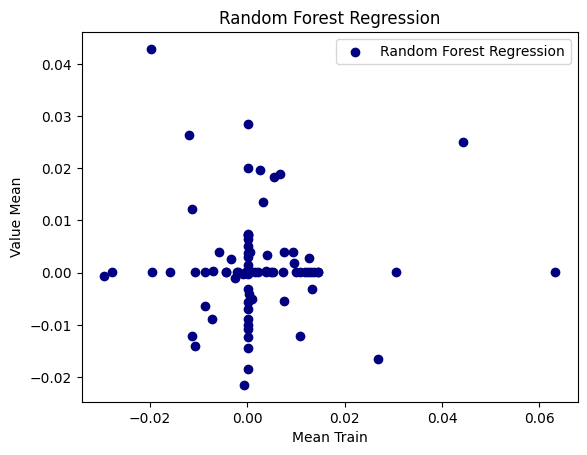

In [7]:
plt.scatter(x=Xhat_train_trans[:100],y=Xhat_val_trans[:100], color='navy', label='Random Forest Regression')
plt.xlabel('Mean Train')
plt.ylabel('Value Mean')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [8]:
rfr.score(X_test_trans, y_test)

-0.1796996023162971

In [9]:
nest=list(range(2,30,2))
minsampspl=list(range(2,20,3))
print(nest)
print(minsampspl)
params = {"n_estimators" : nest,
              "min_samples_split": minsampspl}

rfr2 = GridSearchCV(estimator = RandomForestRegressor(random_state=0), 
                       param_grid = params)
rfr2.fit(X_train_trans,y_train.values.ravel())

print("best hyperparameters:", rfr2.best_params_)
print("mean cross-validated score with best hyperparameters:", rfr2.best_score_)


[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
[2, 5, 8, 11, 14, 17]
best hyperparameters: {'min_samples_split': 17, 'n_estimators': 28}
mean cross-validated score with best hyperparameters: -0.13370759638042667


In [10]:
ourrfr2=rfr2.best_estimator_

Xhat_train_trans2=ourrfr2.predict(X_train_trans)
Xhat_val_trans2=ourrfr2.predict(X_val_trans)
Xhat_test_trans2=ourrfr2.predict(X_test_trans)
print(f"Train mean_absolute_error: ", mean_absolute_error(y_train, Xhat_train_trans2))
print(f"Val mean_absolute_error: ", mean_absolute_error(y_val, Xhat_val_trans2))
print(f"Test mean_absolute_error: ", mean_absolute_error(y_test, Xhat_test_trans2))
print(y_train[:5])
print(Xhat_train_trans2[:5])



Train mean_absolute_error:  0.011873211449577994
Val mean_absolute_error:  0.015774760160531698
Test mean_absolute_error:  0.014114405233741635
            daily_return
2018-07-03     -0.062969
2016-04-04     -0.008550
2017-11-21      0.022357
2020-04-11      0.000000
2018-02-02     -0.013460
[ 0.00028388 -0.00872533  0.00665572  0.00037501  0.00665572]


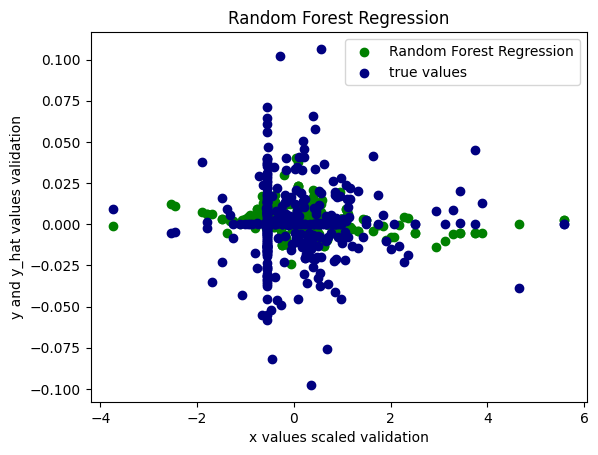

In [13]:
plt.scatter(x=X_val_trans,y=Xhat_val_trans2, color='g', label='Random Forest Regression')
plt.scatter(x=X_val_trans,y=y_val, color='navy', label='true values')
plt.xlabel('x values scaled validation')
plt.ylabel('y and y_hat values validation')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [12]:
print(ourrfr2)

RandomForestRegressor(min_samples_split=17, n_estimators=28, random_state=0)
